In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install citipy
# Add Citipy module
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# End at 6.1.4 --> 

In [4]:
# Add the latitude and longitude to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm suffienct count.
len(cities)

611

In [6]:
# Import the time library and the datetime module from the datetime library. 
import time
from datetime import datetime

In [7]:
# Import the request library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | otterup
Processing Record 2 of set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of set 1 | touros
Processing Record 5 of set 1 | ushuaia
Processing Record 6 of set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of set 1 | port elizabeth
Processing Record 8 of set 1 | jinxiang
Processing Record 9 of set 1 | busselton
Processing Record 10 of set 1 | qaqortoq
Processing Record 11 of set 1 | pozega
Processing Record 12 of set 1 | richards bay
Processing Record 13 of set 1 | tsaratanana
Processing Record 14 of set 1 | tricase
Processing Record 15 of set 1 | dikson
Processing Record 16 of set 1 | golub-dobrzyn
Processing Record 17 of set 1 | punta arenas
Processing Record 18 of set 1 | torbay
Processing Record 19 of set 1 | komsomolskiy
Processing Record 20 of set 1 | new norfolk
Processing Record

In [35]:
# Tally nunmber of cities.
print(len(city_data))

510


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)

In [10]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Otterup,55.5153,10.3976,44.29,92,70,17.27,DK,2022-01-25 02:37:10
1,Touros,-5.1989,-35.4608,77.90,80,100,10.04,BR,2022-01-25 02:37:10
2,Ushuaia,-54.8000,-68.3000,42.46,87,100,31.07,AR,2022-01-25 02:37:11
3,Port Elizabeth,-33.9180,25.5701,69.10,88,100,14.97,ZA,2022-01-25 02:37:11
4,Jinxiang,27.4327,120.6062,52.29,86,100,9.31,CN,2022-01-25 02:37:12
5,Busselton,-33.6500,115.3333,75.09,47,48,11.99,AU,2022-01-25 02:37:12
6,Qaqortoq,60.7167,-46.0333,27.10,77,100,11.92,GL,2022-01-25 02:37:12
7,Pozega,45.3403,17.6853,18.57,68,5,3.15,HR,2022-01-25 02:37:13
8,Richards Bay,-28.7830,32.0377,70.00,86,0,8.88,ZA,2022-01-25 02:37:13
9,Tsaratanana,-16.7833,47.6500,71.19,95,100,3.38,MG,2022-01-25 02:37:14


In [11]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Otterup,DK,2022-01-25 02:37:10,55.5153,10.3976,44.29,92,70,17.27
1,Touros,BR,2022-01-25 02:37:10,-5.1989,-35.4608,77.90,80,100,10.04
2,Ushuaia,AR,2022-01-25 02:37:11,-54.8000,-68.3000,42.46,87,100,31.07
3,Port Elizabeth,ZA,2022-01-25 02:37:11,-33.9180,25.5701,69.10,88,100,14.97
4,Jinxiang,CN,2022-01-25 02:37:12,27.4327,120.6062,52.29,86,100,9.31
5,Busselton,AU,2022-01-25 02:37:12,-33.6500,115.3333,75.09,47,48,11.99
6,Qaqortoq,GL,2022-01-25 02:37:12,60.7167,-46.0333,27.10,77,100,11.92
7,Pozega,HR,2022-01-25 02:37:13,45.3403,17.6853,18.57,68,5,3.15
8,Richards Bay,ZA,2022-01-25 02:37:13,-28.7830,32.0377,70.00,86,0,8.88
9,Tsaratanana,MG,2022-01-25 02:37:14,-16.7833,47.6500,71.19,95,100,3.38


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

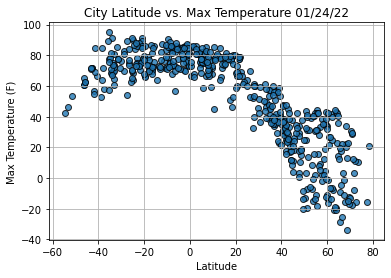

In [16]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

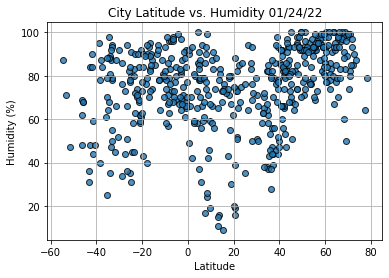

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

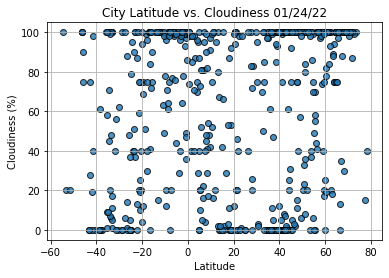

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

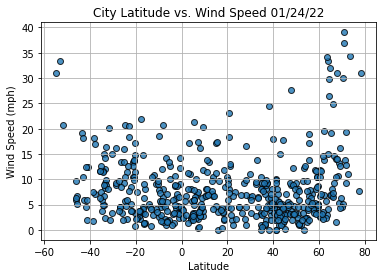

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Locate index 13 in city_data_df
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-01-25 02:37:15
Lat                        -53.15
Lng                      -70.9167
Max Temp                    46.51
Humidity                       71
Cloudiness                     20
Wind Speed                  33.38
Name: 13, dtype: object

In [40]:
# Filter city_data_df for all Northern Hemisphere latitudes.
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
505     True
506    False
507     True
508    False
509     True
Name: Lat, Length: 510, dtype: bool

In [43]:
# DataFrame with all data fitting latitudes greater than or equal to 0.
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Otterup,DK,2022-01-25 02:37:10,55.5153,10.3976,44.29,92,70,17.27
4,Jinxiang,CN,2022-01-25 02:37:12,27.4327,120.6062,52.29,86,100,9.31
6,Qaqortoq,GL,2022-01-25 02:37:12,60.7167,-46.0333,27.10,77,100,11.92
7,Pozega,HR,2022-01-25 02:37:13,45.3403,17.6853,18.57,68,5,3.15
10,Tricase,IT,2022-01-25 02:37:14,39.9304,18.3553,35.31,50,12,18.05
...,...,...,...,...,...,...,...,...,...
503,Narsaq,GL,2022-01-25 02:52:22,60.9167,-46.0500,21.87,84,100,7.14
504,Deputatskiy,RU,2022-01-25 02:49:08,69.3000,139.9000,-15.18,96,100,4.41
505,Kondinskoye,RU,2022-01-25 02:52:22,59.6481,67.4100,-0.69,99,99,4.90
507,Orlik,RU,2022-01-25 02:52:23,52.5178,99.8250,-5.66,91,100,2.01


In [44]:
# Print just the head
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Otterup,DK,2022-01-25 02:37:10,55.5153,10.3976,44.29,92,70,17.27
4,Jinxiang,CN,2022-01-25 02:37:12,27.4327,120.6062,52.29,86,100,9.31
6,Qaqortoq,GL,2022-01-25 02:37:12,60.7167,-46.0333,27.10,77,100,11.92
7,Pozega,HR,2022-01-25 02:37:13,45.3403,17.6853,18.57,68,5,3.15
10,Tricase,IT,2022-01-25 02:37:14,39.9304,18.3553,35.31,50,12,18.05


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

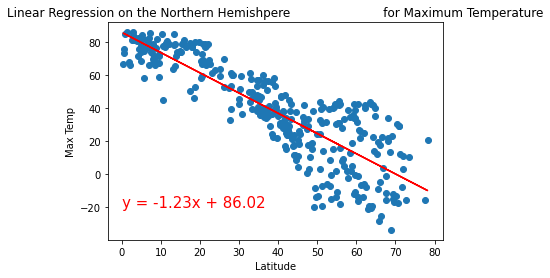

In [48]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemishpere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemishpere \
                       for Maximum Temperature', 'Max Temp', (0,-20))

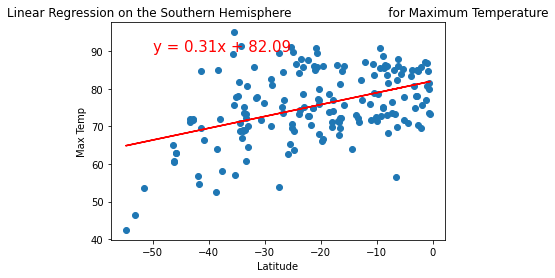

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

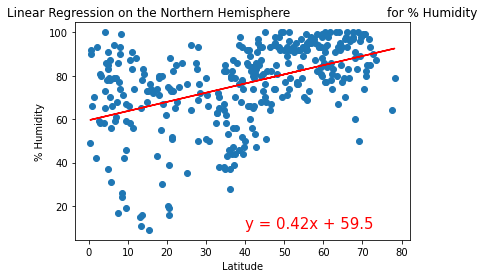

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

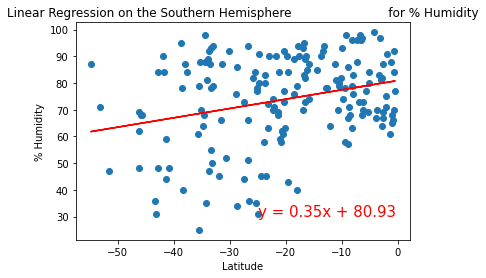

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

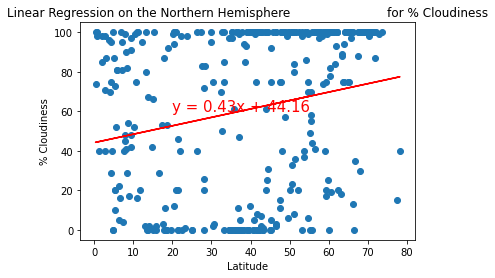

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

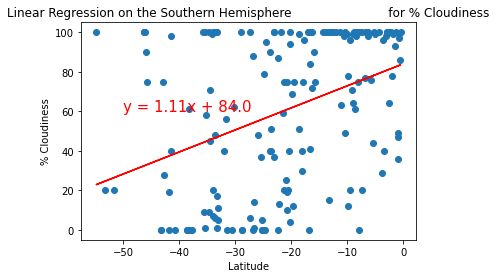

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

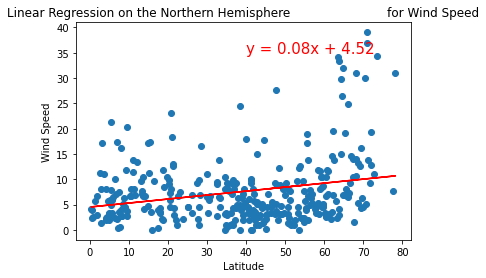

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

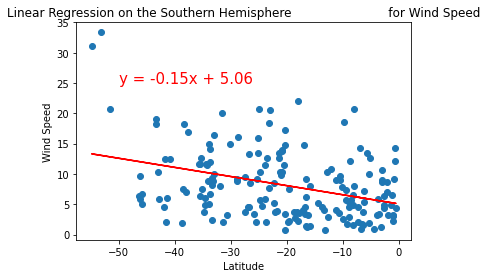

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))